In [1]:
import os
import pandas as pd

In [14]:
!pip install pmdarima

  Using cached pmdarima-1.7.1-cp36-cp36m-win_amd64.whl (608 kB)


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima # for determining ARIMA orders
from pmdarima import auto_arima # for determining ARIMA orders
import warnings
warnings.filterwarnings('ignore')

In [54]:
# os.getcwd()
# os.chdir('C:/users/antony.samarawickrem/projects')
os.listdir()

['.ipynb_checkpoints',
 '.Rhistory',
 '.vscode',
 'betakit.py',
 'coaa',
 'covid.csv',
 'covid.py',
 'desktop.ini',
 'pitch.txt',
 'royalty.csv',
 'royalty.xlsx',
 'Untitled1.ipynb',
 '__pycache__',
 '~$royalty.xlsx']

In [92]:
# df1=pd.read_csv('royalty.csv', parse_dates=[['year', 'month', 'day']], index_col=0) # df2["date"] = df2["date"].dt.strftime("%m/%d/%Y")

In [102]:
df2=pd.read_excel('royalty.xlsx',  parse_dates=['date'], index_col='date')
df2.dropna(inplace=True)
df2=df2.iloc[::-1]
# df2["date"] = df2["date"].dt.strftime("%m/%d/%Y")
# df2['production']=df2['production'].astype(float)
df2['world_prd']=df2['world_prd'].astype(float)
df2.index.freq='YS'
df2.head()

,production,world_prd
date,,
2009-01-01,6,30.0
2010-01-01,15,50.0
2011-01-01,18,55.0
2012-01-01,15,50.0
2013-01-01,16,52.0


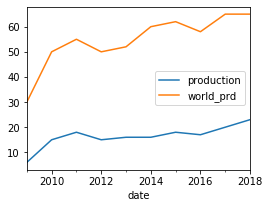

In [105]:
df2.plot(figsize=(4,3))

In [106]:
train=df2.loc[:'2016']
test=df2.loc['2015':]
from statsmodels.tsa.holtwinters import ExponentialSmoothing
test_predictions_add = ExponentialSmoothing(train['world_prd'],trend='add').fit().forecast(2)
test_predictions_mul = ExponentialSmoothing(train['world_prd'],trend='mul').fit().forecast(2)
# test_predictions_add
test_predictions_mul

2017-01-01    58.911554
2018-01-01    58.032366
Freq: AS-JAN, dtype: float64

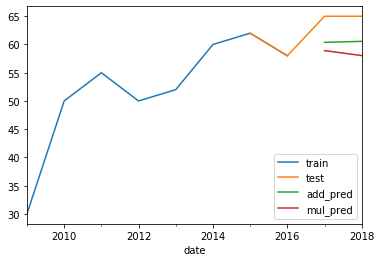

In [107]:
# test['diff'].plot(figsize=(3,3), legend=True)
train['world_prd'].plot(legend=True, label='train')
test['world_prd'].plot(legend=True, label='test')
test_predictions_add.plot(legend=True, label='add_pred')
test_predictions_mul.plot(legend=True, label='mul_pred')